In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function

# MNIST Dataset

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


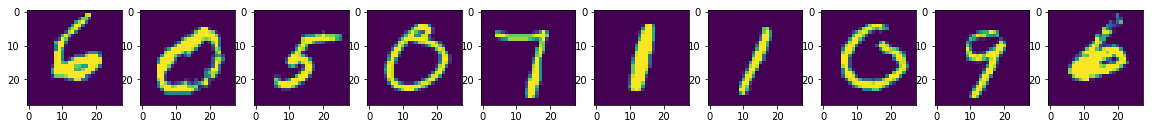

In [21]:
example_batch = mnist.train.next_batch(100)

plt.figure(figsize=(20,2))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(example_batch[0][i,:].reshape((28,28)))
plt.show()


# Linear Regression

### Network and Loss function

In [3]:
tf.reset_default_graph()

# input placeholder
x = tf.placeholder(tf.float32, [None, 784]) # 28**2 = 784

# weight vector
W = tf.Variable(tf.zeros([784, 10]))

# bias
b = tf.Variable(tf.zeros([10]))

# output layer
y = tf.nn.softmax(tf.matmul(x, W) + b)

# true labels
y_ = tf.placeholder(tf.float32, [None, 10])

# loss function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), axis=[1]))


### Optimization

In [4]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train_step = optimizer.minimize(cross_entropy)

# tf.train.AdadeltaOptimizer
# tf.train.AdamOptimizer
# tf.train.RMSPropOptimizer
# ...

init_op = tf.global_variables_initializer()

### Evaluation

In [5]:
# evaluation

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [41]:
print(cross_entropy)
print(x)
print(W)
print(accuracy)

Tensor("Mean:0", shape=(), dtype=float32)
Tensor("Placeholder:0", shape=(?, 784), dtype=float32)
Tensor("Variable/read:0", shape=(784, 10), dtype=float32)
Tensor("Mean_1:0", shape=(), dtype=float32)


### Run the experiment

In [7]:
with tf.Session() as sess:
    sess.run(init_op)
    
    summary_writer = tf.summary.FileWriter("./graph", graph=sess.graph)
    
    for _ in range(1000):
        # get a minibatch of size 100
        batch_xs, batch_ys = mnist.train.next_batch(100)
        
        # run the training step
        feed_dict = {x: batch_xs,
                     y_: batch_ys}
        sess.run(train_step, feed_dict=feed_dict)

    final_W = W.eval(session=sess)
    
    test_accuracy = sess.run(accuracy, feed_dict={x: mnist.test.images,
                                                  y_: mnist.test.labels})
    
print(test_accuracy) 

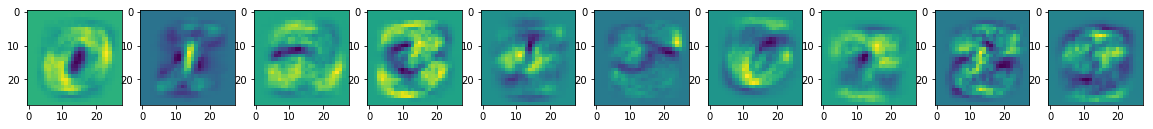

In [10]:
plt.figure(figsize=(20,2))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(final_W[:,i].reshape((28,28)))
plt.show()